# Preprocessing/Loading the data

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import confusion_matrix
import scipy as sp
from scipy.stats import ttest_ind
import warnings

"""
Cin's contribution

Code for recreating figures 2D and 3 from (Galit et al 2018)
"""
# suppresses warning: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
# that occurs during logistic regression
warnings.filterwarnings("ignore")

# classses to predict
y = pd.read_csv("./dataset_EV1/meta/subjects.csv").set_index("Unnamed: 0") # sets the index to "Unnamed 0" to match data points in X later
print(len(pd.read_csv("./dataset_EV1/data/function.csv")))

func = pd.read_csv("./dataset_EV1/data/function.csv").set_index("Unnamed: 0") # sets labels to index
glyc = pd.read_csv("./dataset_EV1/data/glycan-gp120.csv").set_index("Unnamed: 0")
lumigg = pd.read_csv("./dataset_EV1/data/luminex-igg.csv").set_index("Unnamed: 0")
lumi =pd.read_csv("./dataset_EV1/data/luminex.csv").set_index("Unnamed: 0")

# combines all of the above AND the y array, to match up the indeces with the data points automatically
pre_X = pd.concat([func,glyc,lumigg,lumi,y],axis = 1) 

#Final arrays where y only contains the label data,  and X only has the numeric data
y = pre_X[["class.etuv","class.cp","class.nv"]]
X = pre_X.drop(["class.etuv","class.cp","class.nv"],axis = 1)

181


In [3]:
y

,class.etuv,class.cp,class.nv
Unnamed: 0,,,
100681,EC,controller,nonviremic
101013,TP,progressor,nonviremic
103797,VC,controller,viremic
107889,TP,progressor,nonviremic
109477,EC,controller,nonviremic
...,...,...,...
976531,EC,controller,nonviremic
985170,TP,progressor,nonviremic
987427,VC,controller,viremic


In [4]:
X

,ADCD,ADCC,ADNP,CD107a,IFNy,MIP1b,G2FB,G2F,G2B,G1FB,...,SNA.HIV1.Nef,SNA.HIV1.Rev,SNA.p24.HXBc2,VVL.gp120.BAL,VVL.gp140.CN54,VVL.gp41.HXBc2,VVL.HIV1.Integrase,VVL.HIV1.Nef,VVL.HIV1.Rev,VVL.p24.HXBc2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100681,2.84,5.60,14.79,5.20,3.71,16.15,0.1,9.8,0.7,3.5,...,6452.0,8065.0,65227.0,7.0,-16.5,-7001.5,-9.0,-62.5,-15.5,-8.0
101013,2.46,17.53,16.31,9.26,6.58,25.19,0.7,7.6,0.5,7.0,...,-1608.5,-283.5,-494.5,21.5,-11.0,-3046.5,527.0,-9.5,-22.0,-4.0
103797,3.18,19.33,33.81,16.99,13.16,56.03,0.3,4.4,0.2,10.8,...,-162.0,-305.0,6138.0,216.0,30.5,10499.5,778.0,34.0,-10.0,9.0
107889,0.06,18.14,26.67,8.60,4.75,23.98,NaN,NaN,NaN,NaN,...,-1681.0,169.0,-604.0,24.0,3.5,-1566.0,35.0,-14.0,-18.5,-5.0
109477,1.65,14.74,25.70,15.15,10.68,40.12,NaN,NaN,NaN,NaN,...,380.0,1343.0,6564.0,40.0,28.0,1133.0,392.0,-30.5,-34.0,71.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976531,1.35,5.65,53.15,11.68,8.65,49.77,0.8,8.2,0.4,10.3,...,927.0,6998.0,7804.0,28.0,-19.0,-3547.5,-5.0,6.5,-32.5,-14.0
985170,1.24,14.64,10.97,15.22,8.10,28.99,0.1,5.3,0.7,5.8,...,-1712.0,59390.0,-1885.0,21.5,61.5,373.5,183.0,31.5,-19.0,-29.5
987427,2.29,12.81,32.57,10.95,7.36,40.98,NaN,NaN,NaN,NaN,...,2674.0,-196.0,8539.0,40.5,-5.0,5522.0,1081.0,5.5,-14.0,-2.0


In [5]:
# Preprocessing by impution

def process_data_etuv(X,y):
    """
    Converts inputted X and y
    dataframes into scaled/label encoded
    forms that can be used by the model
    
    X: an dataframe sorted by patient number, (the df indeces) of raw measurements 181 rows × 548 columns
    y: an dataframe sorted by patient number, for patient class (contains all of EC, viremic, controller, etc...)
    
    X_processed: a dataframe where all the data under each column/variable is scaled/zscored
    y_processed: a 1-D array for just controller/progressor classes,
    where each label of class.etuv is encoded as an integer 0-3
    """
    # Step 1: Imputing NaNs in X by setting them to the column mean
    imp_means = SimpleImputer(missing_values=np.nan, strategy='mean') #fills in NaNss
    X_processed = imp_means.fit_transform(X) # fills in nans within X_processed

    # # Step 1.5: scaling and centering each data point to a mean of 0 and a std dev of 1
    X_processed = pd.DataFrame(X_processed).apply(sp.stats.zscore)

    # Step 2: label encoding classes (y)
    le = LabelEncoder() #used for converting label data into numbers
    # only encodes and returns the encoded class labels under "class.etuv" column. Other columns
    # didn't matter for multinomial regression
    y_processed = np.array(le.fit_transform(y["class.etuv"])) 

    return X_processed, y_processed
X_processed, y_processed = process_data_etuv(X,y)
X_processed

,0,1,2,3,4,5,6,7,8,9,...,538,539,540,541,542,543,544,545,546,547
0,1.487939,-1.776257,-0.075466,-1.689876,-1.337246,-1.762574,-1.701868e+00,0.157752,0.435213,-1.005240e+00,...,1.943712,0.587111,7.727547,-0.268620,-0.742011,-1.630145,-0.515729,-2.824954,0.071649,-0.230714
1,1.132554,0.554901,0.090709,-0.510496,-0.462732,-0.987999,-8.523086e-02,-0.537775,-0.220954,4.783975e-01,...,-0.306800,-0.187494,-0.371596,-0.214244,-0.589440,-0.807274,-0.081580,-0.610123,-0.099682,-0.096224
2,1.805915,0.906626,2.003908,1.734974,1.542253,1.654470,-1.162989e+00,-1.549449,-1.205204,2.089204e+00,...,0.097067,-0.189489,0.445756,0.515154,0.561776,2.011084,0.121725,1.207710,0.216622,0.340870
3,-1.111980,0.674097,1.223323,-0.702218,-1.020349,-1.091675,5.982759e-16,0.000000,0.000000,3.764958e-16,...,-0.327042,-0.145509,-0.385090,-0.204868,-0.187208,-0.499244,-0.480090,-0.798175,-0.007427,-0.129846
4,0.375024,0.009726,1.117277,1.200477,0.786575,0.291251,5.982759e-16,0.000000,0.000000,3.764958e-16,...,0.248395,-0.036581,0.498254,-0.144866,0.492426,0.062305,-0.190927,-1.487698,-0.415987,2.442283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.094457,-1.766487,4.118265,0.192485,0.168015,1.118093,1.842086e-01,-0.348086,-0.549038,1.877256e+00,...,0.401118,0.488111,0.651064,-0.189868,-0.811361,-0.911512,-0.512490,0.058505,-0.376449,-0.432450
177,-0.008417,-0.009814,-0.493090,1.220811,0.000426,-0.662403,-1.701868e+00,-1.264916,0.435213,-3.027832e-02,...,-0.335697,5.349239,-0.542953,-0.214244,1.421721,-0.095715,-0.360213,1.103236,-0.020606,-0.953600
178,0.973567,-0.367401,1.868344,-0.019571,-0.225059,0.364938,5.982759e-16,0.000000,0.000000,3.764958e-16,...,0.888885,-0.179375,0.741641,-0.142991,-0.422999,0.975474,0.367149,0.016716,0.111187,-0.028979
179,0.038344,0.486510,2.625970,1.209192,0.533666,0.272401,-8.523086e-02,0.758433,-0.877121,4.783975e-01,...,-0.169292,-0.204659,-0.570927,1.726443,-0.450739,0.113488,-0.330244,-0.986227,-0.587318,-0.735053


# Figure 2A, Multinomal Accuracy

In [5]:
# Multinomial Logistic Regression Classifier. 
# in order to use the multinomial model, the documentation stated that we needed to use the "saga" solver. 
# l1_ratio represents the elastic net mixing parameter the paper used for presenting results (alpha = 0.8)

LR=LogisticRegression(multi_class = "multinomial",solver = "saga",penalty = "elasticnet",l1_ratio = .8)

In [6]:
kf = KFold(n_splits=10,shuffle = True)

# reimplemementation of 2A in the paper, where the authors took their best LR parameters,
# and did 100 iterations of 10-fold cross validtions on the processed data, each time
# recording the average cross validation score. They then created a boxplot with the data

avg_scores = [] #stores the average score of the 10 folds, for 100 different 10-folds

X_processed, y_processed = process_data_etuv(X,y)

# Cross validation scors for the 4-class part of 2A full model

for cv_iteration in range(100):
    k_10_scores = []
    for i, (train_index, test_index) in enumerate(kf.split(X_processed)):

        # random indeces for training set
        x_train = X_processed.loc[train_index]
        y_train = y_processed[train_index] # don't use loc ssince it's a 1D array

        # remaining indeces for test set
        x_test =  X_processed.loc[test_index]
        y_test = y_processed[test_index] 

        # Fits training set
        LR=LogisticRegression(multi_class = "multinomial",solver = "saga",penalty = "elasticnet",l1_ratio = .8)
        LR.fit(x_train,y_train)
        
        # Calculates the score for the current fold and adds it to k_10_scores
        k_10_scores.append(LR.score(x_test,y_test))
    
    #calculates the means of accuracies of the 10 folds and records it in avg_scores
    avg_scores.append(np.mean(np.array(k_10_scores)))

    

In [7]:
# Cross validation scoress for the 4-class part of 2A permuted data
# Carries out the above cross validation on permuted data, where classes are shuffled on the data points. 

score_rand = permutation_test_score(LR, X_processed, y_processed, scoring="accuracy", cv=kf, n_permutations=100)

In [8]:
# score_rand is a tuple, where the first item is an array of the scores for each cross validation 
# of permuted data
permuted_scores = score_rand[1] 
#score_rand

[Text(0.5, 1.0, '4-Class Logistic Regression Model'), Text(0, 0.5, 'Accuracy')]

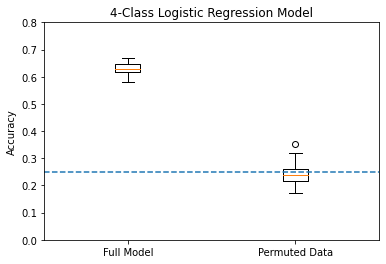

In [9]:
# plotting the permuted and full model data
# the blue baseline represents the case where
# we make a prediction at random, which is expected
# to be the result of permutation

fig, ax = plt.subplots(1)

scores = np.array(avg_scores) # list --> np.array

# puts data + labels into a dataframe so it can be easily turned into boxplots
df = pd.DataFrame({"Full Model":scores,"Permuted Data":permuted_scores})
labels = ["Full Model","Permuted Data"]

# plotting and formatting
ax.boxplot(df,labels=labels) # plots full model and permuted data model
plt.axhline(.25, linestyle="dashed") # baseline
ax.set_ylim(0.0,0.8)
ax.set(
    title = "4-Class Logistic Regression Model",
    ylabel = "Accuracy",

)

# Figure 2D, Confusion Matrix

[Text(0.5, 1.0, '4-Class Logistic Regression Classifier Confusion Matrix'),
 Text(0.5, 15.0, 'True Class'),
 Text(33.0, 0.5, 'Predicted class')]

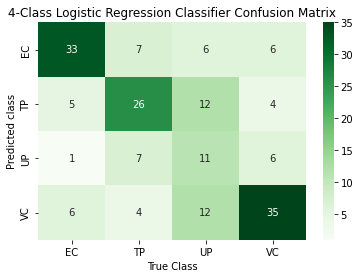

In [10]:
# Confusion matrix for Multinomial Logistic Regression
# Intersectionss between predicted and true class represent true positives for a given class
# Parts of a row for the predicted class that don't match the True class are false negatives.
# Parts of a column where the True class wasn't picked are false positives.
# Lastly, relative to the other three for a given class, any other box represents a true negative

kf = KFold(n_splits=10,shuffle = True)
X_processed, y_processed = process_data_etuv(X,y)

# Use cross_val_predict to get y_pred
kf = KFold(n_splits=10,shuffle = True)
LR.fit(X_processed, y_processed)
y_pred = cross_val_predict(LR, X_processed, y_processed, cv = kf) # gives us the matrix with inaccuracies

# Plotting and formatting the confusion matrix
MLR_CM = confusion_matrix(y_pred,y_processed)
ax = sns.heatmap(MLR_CM, annot=True, cmap='Greens')

#Labeling classes in the CM
classes = ["EC","TP","UP","VC"]
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set(title = "4-Class Logistic Regression Classifier Confusion Matrix",
       xlabel = "True Class",
       ylabel = "Predicted class")

# Figure 2D, probability scores 

In [11]:
# Part of multinomial logistic regression
# Determines the prediction probability for true class of each patient 

#fits model to processed/label encoded data
LR.fit(X_processed, y_processed)

# creates a new dataframe containing the predicted probabilities, with 4 columns representing the class prediction probability
df = pd.DataFrame(LR.predict_proba(X_processed))
df["class.etuv"] = np.array(y["class.etuv"])

# getting the labels associated with the numbers after label encoding
le = LabelEncoder() #used for converting data into numbers
y_processed = np.array(le.fit_transform(y["class.etuv"])) 
le_name_mapping = dict(zip( le.transform(le.classes_),le.classes_)) # makes a dictionary connecting label encoded numbers with their respective classess

# edits the table so that the dataframe is easier to work with later on
for i in range (4): #renames label encoded classes to their actual class name (0 --> "EC")
    df.rename(columns = {i:le_name_mapping[i]},inplace=True)
df.rename(columns = {"class.etuv":"True Class"},inplace=True) # will store the actual class of each data point

# predicts class with cross_val_predict, and converts them to the class' actual name
le_vals = cross_val_predict(LR, X_processed, y_processed, cv = kf) 
df["Predicted Class"] = [le_name_mapping[le_val] for le_val in le_vals] #converts label encoded value back to class name

# will match the predicted probability from the predicted proba columns with the true class at each data point
df["Probability of being true class"] = np.nan
for i in range(len(y_processed)):
    current_true_class = le_name_mapping[y_processed[i]] # true class of the current index
    df["Probability of being true class"][i] = df.iloc[i][current_true_class] # sets it to the predicted probability of the true clas for the current data point
df

,EC,TP,UP,VC,True Class,Predicted Class,Probability of being true class
0,0.895948,0.000130,0.048287,0.055635,EC,VC,0.895948
1,0.134696,0.740567,0.118826,0.005910,TP,TP,0.740567
2,0.005162,0.004631,0.012359,0.977847,VC,VC,0.977847
3,0.015322,0.951450,0.031168,0.002061,TP,TP,0.951450
4,0.929997,0.012728,0.035638,0.021637,EC,EC,0.929997
...,...,...,...,...,...,...,...
176,0.929856,0.032783,0.006547,0.030814,EC,EC,0.929856
177,0.021889,0.829966,0.077397,0.070749,TP,VC,0.829966
178,0.127728,0.032969,0.102150,0.737152,VC,EC,0.737152
179,0.547056,0.095823,0.036260,0.320860,EC,VC,0.547056


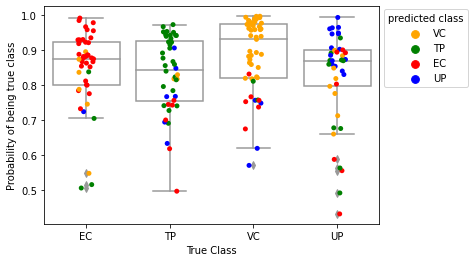

In [12]:
fig,ax = plt.subplots(1)

colormap = {
    "EC":"red",
    "TP":"green",
    "UP":"blue",
    "VC":"orange"
}
# Plots based divided by true class, with the color repreenting the predicted class (and its probability) 
sns.stripplot(y ="Probability of being true class", x = "True Class",hue = "Predicted Class", data= df, palette = colormap)
sns.boxplot(y ="Probability of being true class", x = "True Class", data= df,color= "white")

# formatting to move the legend to the upper right outisde the box
plt.legend(title = "predicted class",loc = "upper right",bbox_to_anchor=(1.28, 1.01))

Figure 2A (Galit et al. 2018): Prediction probability class scores (measures of model accuracy when predicting the true class of a data point) were found for each patient data point class and plotted, with color representing what the Multinomial Logistic Regression predicted the data point to be. 

# Figure 3A

In [13]:
#Figure 3A

# 1. group glycan data by:

# two data tables, the glycan experimental variable data and their labels
glycan_data = pd.read_csv("dataset_EV1/data/glycan-gp120.csv").set_index("Unnamed: 0")
glycan_data.head()
hiv_specific_data = glycan_data.drop(["G0.total","G1.total","G2.total","F.total","B.total","S.total"],axis = 1)

# The total of the non-total columns in a row
#hiv_specific_data ["Sum of HIV-Specific IgG Abundances"] = hiv_specific_data.apply(np.sum,axis=1)
hiv_specific_data
totalHIV_spec = hiv_specific_data.apply(np.sum,axis=1)


In [14]:
glycan_labels =  pd.read_csv("dataset_EV1/meta/glycans.csv") #metadata
glycan_labels

,Unnamed: 0,b,s,g,f
0,G2FB,b,false,g2,f
1,G2F,false,false,g2,f
2,G2B,b,false,g2,false
3,G1FB,b,false,g1,f
4,G1F,false,false,g1,f
5,G1B,b,false,g1,false
6,G0FB,b,false,g0,f
7,G1,false,false,g1,false
8,G0F,false,false,g0,f
9,G0B,b,false,g0,false


In [15]:
b_column = glycan_labels["b"] # tells us the glycans that are bisected, indicated by a value of "b"
all_glycan_labels = glycan_labels["Unnamed: 0"] #stores all glycan labels ("G2FB","G2F", etc regardless of bisection)
bisected_label = [] # will only store labels with "b" in the b column of the glycan metadaata

#iterates through b column, recordng the rows labeled with "b"
for index in range(len(b_column)):
    if b_column[index] == "b": #checks if the row label is "b" for bisected glycan
        bisected_label.append(all_glycan_labels[index]) # adds the glycan variable name to the list 
# remove the last glycan label, which corresponds with "B.total", so we can get a df of only HIV-specific glycans
bisected_label.pop() 

# For each row, calculate the HIV-specific glycan bisection by
# taking the sum of the bisected HIV-specific glycans and 
# dividing them by the sum of all HIV-specific glycans within 
# a row (excludes columns with ".total" in the name)
# then multiplying by 100 to get the percentage
hiv_spec_bg  = glycan_data[bisected_label]
hiv_spec_bg["HIV-Specific Tot"]  =100 * (hiv_spec_bg.apply(np.sum,axis = 1) / totalHIV_spec)
hiv_spec_bg


,G2FB,G2B,G1FB,G1B,G0FB,G0B,G2S1B,G2S2FB,G2S2B,HIV-Specific Tot
Unnamed: 0,,,,,,,,,,
100681,0.1,0.7,3.5,3.3,0.4,1.1,0.3,1.2,0.5,11.909871
101013,0.7,0.5,7.0,7.4,5.9,7.8,0.5,0.5,0.8,33.191035
103797,0.3,0.2,10.8,6.7,7.0,7.9,0.4,0.7,1.3,37.473461
113706,0.2,0.3,2.7,2.0,0.3,3.6,0.3,1.1,2.3,13.704497
128522,0.1,0.7,6.8,6.4,0.4,1.8,0.2,1.4,0.0,19.078242
...,...,...,...,...,...,...,...,...,...,...
975508,0.0,0.1,4.7,4.7,0.1,1.4,1.1,0.0,9.2,22.350472
976531,0.8,0.4,10.3,2.2,2.8,3.4,1.1,1.5,1.2,25.000000
985170,0.1,0.7,5.8,2.1,2.2,3.8,0.5,2.3,1.6,19.937370


In [16]:
# "B.total" data points, or the total bisection among the patient's total IgG
total_bg = glycan_data["B.total"]

#removes NaNs for subjects that had no glycan measurements
df_tot = pd.concat([total_bg,y],axis = 1).dropna(axis=0) 
df_HS = pd.concat([hiv_spec_bg,y],axis = 1).dropna(axis=0)


,G2FB,G2B,G1FB,G1B,G0FB,G0B,G2S1B,G2S2FB,G2S2B,HIV-Specific Tot,class.etuv,class.cp,class.nv
Unnamed: 0,,,,,,,,,,,,,
100681,0.1,0.7,3.5,3.3,0.4,1.1,0.3,1.2,0.5,11.909871,EC,controller,nonviremic
101013,0.7,0.5,7.0,7.4,5.9,7.8,0.5,0.5,0.8,33.191035,TP,progressor,nonviremic
103797,0.3,0.2,10.8,6.7,7.0,7.9,0.4,0.7,1.3,37.473461,VC,controller,viremic
113706,0.2,0.3,2.7,2.0,0.3,3.6,0.3,1.1,2.3,13.704497,EC,controller,nonviremic
128522,0.1,0.7,6.8,6.4,0.4,1.8,0.2,1.4,0.0,19.078242,VC,controller,viremic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949964,0.4,0.5,5.5,2.9,0.0,4.8,0.1,0.6,0.7,16.811280,TP,progressor,nonviremic
975508,0.0,0.1,4.7,4.7,0.1,1.4,1.1,0.0,9.2,22.350472,EC,controller,nonviremic
976531,0.8,0.4,10.3,2.2,2.8,3.4,1.1,1.5,1.2,25.000000,EC,controller,nonviremic


(-1.92, 50.0)

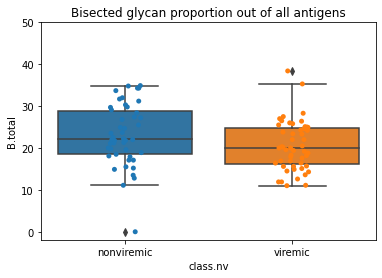

In [17]:
# Plotting total glycan bisection percentage
sns.boxplot(y = "B.total",
            x ="class.nv" ,
            data = df_tot,
            ).set(title = "Bisected glycan proportion out of all antigens")
sns.stripplot(y = "B.total",
            x ="class.nv" ,
            data = df_tot,
            ).set_ylim(top = 50)


(0.0, 50.0)

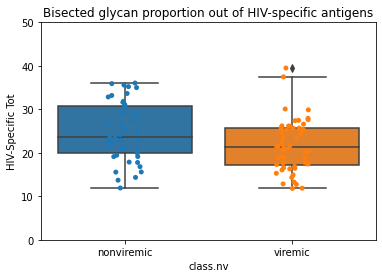

In [18]:
# Plotting HIV-specific bisection percentage
sns.boxplot(y = "HIV-Specific Tot",
            x ="class.nv" ,
            data = df_HS,
            ).set(title = "Bisected glycan proportion out of HIV-specific antigens")
sns.stripplot(y = "HIV-Specific Tot",
              x ="class.nv", 
              data = df_HS  
             ).set_ylim(bottom = 0,top = 50)


In [20]:
# Bisected glycan percentages of total IgG
v_tot_bis = df_tot[df_tot["class.nv"]=="viremic"]["B.total"]
av_tot_bis = df_tot[df_tot["class.nv"]=="nonviremic"]["B.total"]

# Bisected glycan percentages of HIV-specific IgG
v_hiv_bis = df_HS[df_HS["class.nv"]=="viremic"]["HIV-Specific Tot"]
av_hiv_bis = df_HS[df_HS["class.nv"]=="nonviremic"]["HIV-Specific Tot"]

# Carries out uncorrected two-tailed unpaired t-test for each combination of groups:

# Total glycan bisection proportions between nonviremic and viremic patients
av_tot_v_tot_pval = ttest_ind(av_tot_bis,v_tot_bis,alternative='two-sided').pvalue

# HIV-specific glycan bisection proportions between nonviremic and viremic patients
av_hiv_v_hiv_pval = ttest_ind(av_hiv_bis,v_hiv_bis,alternative='two-sided').pvalue

# HIV-specific glycan bisection for nonviremic patients vs total glycan bisection for nonviremic patients
av_hiv_av_tot_pval = ttest_ind(av_hiv_bis,av_tot_bis,alternative='two-sided').pvalue

# presenting and formating T-test results
template ="{0} {1} bisected glycans vs {2} {3} bisected glycans pvalue: {4}"
print(template.format("AV","Total","V","Total",av_tot_v_tot_pval))
print(template.format("AV","HIV-specific","V","HIV-Specific",av_hiv_v_hiv_pval))
print(template.format("AV","HIV-specific","AV","Total",av_hiv_av_tot_pval))


AV Total bisected glycans vs V Total bisected glycans pvalue: 0.05466690334071025
AV HIV-specific bisected glycans vs V HIV-Specific bisected glycans pvalue: 0.015238585935999742
AV HIV-specific bisected glycans vs AV Total bisected glycans pvalue: 0.24150928642451489


# Figure 3B

In [21]:
# metadata tables
detect_meta = pd.read_csv("dataset_EV1/meta/detections.csv") # lists the detection reagent used and the group it falls under
antigen_meta = pd.read_csv("dataset_EV1/meta/antigens.csv") # listss the antigen used an the group it falls under

# detections table
lumigg = pd.read_csv("./dataset_EV1/data/luminex-igg.csv").set_index("Unnamed: 0")
lumi =pd.read_csv("./dataset_EV1/data/luminex.csv").set_index("Unnamed: 0")
antibody_readings = pd.concat([lumi,lumigg],axis = 1)

# represents all unique Fc array conditions as a string containing their antigen specificities and the detection
conditions = np.array(antibody_readings.columns,dtype = str)
# will look like: array(['C1q.6H.HIV1.p66', 'C1q.gp120.96ZM651', 'C1q.gp120.BAL', ... 'IgG.p24.IIIb', 'IgG.SOSIP'],dtype='<U34')

# combines all data relaated to Fc array readings as well as the four patient classes, matched by data point
fc_array_all_class = pd.concat([lumi,lumigg,y["class.etuv"]],axis = 1)

# removes data points falling under "VC" and "UP"
fc_arr_TP_EC = fc_array_all_class[(fc_array_all_class["class.etuv"] == "TP") | (fc_array_all_class["class.etuv"] == "EC")]
fc_arr_TP_EC 

,C1q.6H.HIV1.p66,C1q.gp120.96ZM651,C1q.gp120.BAL,C1q.gp120.BAL.Kif,C1q.gp120.CM,C1q.gp120.CN54,C1q.gp120.Du151,C1q.gp120.Du156.12,C1q.gp120.IIIb,C1q.gp120.JRCSF,...,IgG.gp41.HXBc2,IgG.IIIb.pr55.Gag,IgG.HIV1.Integrase,IgG.HIV1.Nef,IgG.HIV1.Rev,IgG.HIV1.Vif,IgG.p24.HXBc2,IgG.p24.IIIb,IgG.SOSIP,class.etuv
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100681,100276.0,4.3,545.5,18.7,17.2,-20.0,6.2,-27.8,-8.5,184.5,...,196446.0,2804.0,197194.5,159252.0,26876.0,8268.5,158492.0,165700.5,116198.0,EC
101013,1107.5,-3.7,3.5,0.2,2.7,-3.5,-5.8,-21.8,12.0,1.5,...,184816.0,692.0,183272.5,20047.5,798.5,2520.5,13425.0,22777.0,51587.0,TP
107889,-78.0,3.8,2.5,1.2,-2.8,7.5,-17.8,-12.8,-7.0,-1.0,...,185115.0,251.0,52808.0,934.0,700.5,2190.0,6452.0,5289.0,44045.0,TP
109477,17445.0,-10.7,-6.5,3.7,-4.8,4.5,-6.3,-34.8,-3.5,-14.5,...,187718.0,1674.0,179726.0,4714.0,1637.5,6801.5,132180.5,140471.5,34257.5,EC
113706,10571.0,-2.2,-11.5,10.7,-12.8,4.5,-10.8,-31.8,-1.0,2.5,...,191379.0,935.0,185898.0,6329.0,487.5,2564.0,162085.0,149994.0,16305.0,EC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975508,129981.0,2.8,-19.0,-3.8,-3.3,-4.5,4.2,-14.8,11.5,4.5,...,192991.0,2452.0,198138.5,40958.5,2202.0,7073.0,175914.5,173174.0,74018.0,EC
976531,17852.5,-5.2,-1.5,-4.3,-5.3,-1.5,-4.8,-20.8,4.5,7.5,...,184401.0,2231.0,184700.5,101539.0,40291.0,6548.0,182282.0,185392.0,99881.0,EC
985170,119551.0,3.8,18.5,5.7,0.7,5.5,10.2,-20.8,7.5,34.5,...,193935.5,2193.0,195329.0,19253.0,145227.0,6352.0,146021.5,136476.0,72130.0,TP


In [22]:
# creating a table in pandas format to make plotting with seaborn easy
volcano_table = pd.DataFrame({"conditions":conditions})

# creating empty columns to store p-value and fold change data,
# as well as metadata for that particular condition for plottng w/ sns
volcano_table["- log10(pval)"]= np.nan
volcano_table["log2(Fold Change) (EC/TP)"]= np.nan
volcano_table["Antigen Specificity"] = np.nan
volcano_table["Detection Reagent"]= np.nan

#### Functions for helping calculate and label the data needed for completing the volcano plot:

In [23]:
# Step 1: given a condition name ("C1q.6H.HIV1.p66"), get the info about the detection and antigen used ["C1q","HIV-other"]

test_str = "C1q.6H.HIV1.p66"
def find_det_anti_groups(condition):
    """
    Given a string in the form "C1q.6H.HIV1.p66"
    representing a treatment, determines the 
    detection type and antigen associated with 
    the condition
    given:"C1q.6H.HIV1.p66", returns ["C1q","HIV-other"]
    
    condition: a string containing the detection
    and antigen used in the variable separated 
    by one period
    
    @return: an list containing the antigen group
    """
    # split the inputted string by the first period only
    # first item is the detection, second item the antigen
    # "C1q.6H.HIV1.p66" --> ['C1q', '6H.HIV1.p66']
    
    # Note: this split() strategy mostly works assuming the detection string has no periods itself,
    # since i couldn't find a good fix in time, I just hardcoded the exceptions 
    det_is_not_an_exception = True
    det_anti_list = []
    det_exceptions = ["FcgRIIa.H131","FcgRIIa.R131","FcgRIIIa.F158","FcgRIIIa.V158","FcgRIIIb.NA1","FcgRIIIb.SH"]
    for det in det_exceptions: # iterates through all detection exceptions (those that include a period in the name)
        if det in condition:
            anti = condition.replace(det+".","") # removes the detection part of the string to get the antigen part
            det_anti_list = [det,anti]
            det_is_not_an_exception = False
    if det_is_not_an_exception:
        det_anti_list = condition.split(".",1)
    
    # note: detect_meta and antigen_meta are globally defined pd dataframe variables
    
    # getting the string for the group that a detection falls under
    det_group = detect_meta['group'].where(detect_meta['detection'] == det_anti_list[0]).dropna().values[0]    
    
    # getting the string for the group that an antigen falls under
    anti_group = antigen_meta['group'].where(antigen_meta['antigen'] == det_anti_list[1]).dropna().values[0]
    
    return [det_group,anti_group]

# Step 2 function: for helping calculating log10 and fold change

def get_condition_array(df,col):
    """
    Calculates and returns an array
    of the uncorrected data for a given group
    (expected to either be "TP" or "EC")
    
    
    df: some dataframe that either only contains "TP"
    or "VC" data ponts
    col: a string representing the name of the current
    condition to return an array for (i.e "IgG.gp41.HXBc")
    """
    
    return np.array(df[col])

In [24]:
for i in range(len(conditions)): 
    # Step 1: label the antigen specificity and detection reagent for each condition
    
    # a list containing the detection and antigen group, based on the condition name
    det_anti_list = find_det_anti_groups(conditions[i])
    volcano_table.loc[i,["Detection Reagent",'Antigen Specificity']] = det_anti_list
    
    # Step 2: calculating the log10(pval) and log2(Fold Change) for the condition
     # a list containing the detection group and
    tp_ec_series = fc_arr_TP_EC.groupby("class.etuv").apply(get_condition_array,conditions[i])
    tp_arr = tp_ec_series["TP"]
    ec_arr = tp_ec_series["EC"]
    log10_pval = -np.log10(ttest_ind(tp_arr,ec_arr,alternative='two-sided').pvalue)
    log2_fold_change = np.log2(np.mean(ec_arr)/np.mean(tp_arr))
       
    
    volcano_table.loc[i,["- log10(pval)","log2(Fold Change) (EC/TP)"]] = [log10_pval,log2_fold_change]
volcano_table

,conditions,- log10(pval),log2(Fold Change) (EC/TP),Antigen Specificity,Detection Reagent
0,C1q.6H.HIV1.p66,0.161565,0.191886,HIV-other,C1q
1,C1q.gp120.96ZM651,1.700730,1.128695,gp120,C1q
2,C1q.gp120.BAL,0.265151,NaN,gp120,C1q
3,C1q.gp120.BAL.Kif,0.261675,-0.349496,gp120,C1q
4,C1q.gp120.CM,0.396129,-2.275278,gp120,C1q
...,...,...,...,...,...
512,IgG.HIV1.Rev,0.112349,0.306674,HIV-other,IgG
513,IgG.HIV1.Vif,0.589330,-0.201666,HIV-other,IgG
514,IgG.p24.HXBc2,2.633095,0.928366,p24,IgG
515,IgG.p24.IIIb,2.826255,0.971618,p24,IgG


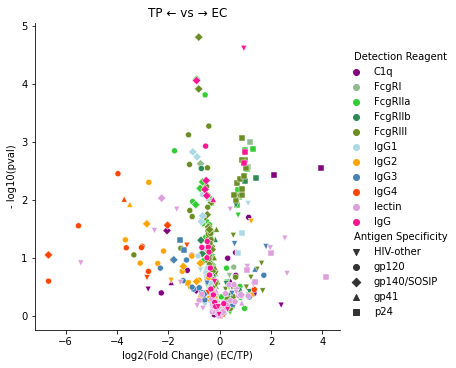

In [25]:
# Note: in the meta data for antigen_shape, the glycan data seems to not be included
antigen_shape = { #dictionaryfor plotting shape
    "HIV-other":"v", #replaces upside down arrow from paper
    "gp120":"o", #circle
    "gp140/SOSIP":"D", #diamond
    "gp41":"^", #triangle
    "p24":"s" #square
}

# Note: in the metadata for detections, "Glycan" was excluded, and instead there's a group called "IgG"
# Some colors also changed since the ones listed in the dataset were unavailable in matplotlib
color_dict = { #dictionary for plotting color, copied from color.csv
    "FcgRI":"darkseagreen",
    "FcgRIII":"olivedrab",
    "FcgRIIa":"limegreen",
    "FcgRIIb":"seagreen",
    "IgG":"deeppink",
    "IgG1":"lightblue",
    "IgG2":"orange",
    "IgG3":"steelblue",
    "IgG4":"orangered",
    "C1q":"purple",
    "lectin":"plum"
    
}

plt = sns.relplot(
    data = volcano_table,x = "log2(Fold Change) (EC/TP)",y = "- log10(pval)",
    hue = "Detection Reagent",
    style = "Antigen Specificity",
    markers = antigen_shape,
    palette =color_dict )

#formatting title
plt.set(title = "TP ← vs → EC")


Figure 3B (Galit et al. 2018): Results from an Fc array, which measures immune response magnitudes using a particular detection reagent and antigen. They compared measurements between EC and TP patients using uncorrected independent 2-tailed T-tests between their respective antigen-detection measurements, and plotted the significance (log10 p-value) of the difference and the ratio between the mean of the measurements for the two groups (log2 fold change) on a volcano plot.


# Random Forest Analysis

In [26]:
# Random forest extension

X_processed, y_processed = process_data_etuv(X,y)

# Cross Validation for the best value of max_depth

N=100 #largest max depth/n_estimator

best_n_estimators = 0
best_ne_score=-np.inf
ne_scores=np.zeros(N)

best_depth = 0
best_depth_score = -np.inf
depth_scores=np.zeros(N)

#Cross validating for number of estimators/trees
for ne in range(1,N+1): #iterates through values 1 - 40 to use as the number of estimators for of the model
    
    RF = RandomForestClassifier(n_estimators=ne)
    
    #adds the average score in 10 folds to the list 
    # ne-1 since the range starts at 1
    
    ne_scores[ne-1]=cross_val_score(RF,X_processed,y_processed,cv=kf).mean()
    
    # if the current score is better, replaces the best recorded best_ne_score with current one
    if ne_scores[ne-1]>best_ne_score:
        best_n_estimators=ne #sets the best estimator
        best_ne_score=ne_scores[ne-1] # record its score
        
#Cross validating for the max depth of the trees

N = 100
for d in range(1,N+1): #iterates through values 1 - 40 to use as the the max depth of the model
    
    RF = RandomForestClassifier(max_depth=d,n_estimators=best_n_estimators)
    
    #adds the average score in 10 folds to the list 
    depth_scores[d-1]=cross_val_score(RF,X_processed,y_processed,cv=kf).mean()
    if depth_scores[d-1]>best_depth_score: # if the current score is better, replaces the best recorded depth with current
        best_depth=d
        best_depth_score=depth_scores[d-1]

template_ne = "Best n_estimators: {0} (score = {1})"
template_d = "Best max_depth: {0} (score = {1})"

print(template_ne.format(best_n_estimators,best_ne_score))
print(template_d.format(best_depth,best_depth_score))

Best n_estimators: 64 (score = 0.6020467836257309)
Best max_depth: 5 (score = 0.6017543859649123)


In [27]:
kf = KFold(n_splits=10,shuffle = True)
avg_RF_scores = []
X_processed, y_processed = process_data_etuv(X,y)

# 100 cross validations of RF accuracy for the best_depth/num_estimators determined in previous step

for cv_iteration in range(100):
    k_10_scores = []
    for i, (train_index, test_index) in enumerate(kf.split(X_processed)):

        # random indeces for training set
        x_train = X_processed.loc[train_index]
        y_train = y_processed[train_index] # don't use loc ssince it's a 1D array

        # remaining indeces for test set
        x_test =  X_processed.loc[test_index]
        y_test = y_processed[test_index] 

        # Fits training set
        RF = RandomForestClassifier(max_depth=best_depth,n_estimators=best_n_estimators)        
        RF.fit(x_train,y_train)
        
        # Calculates the score for the current fold and adds it to k_10_scores
        k_10_scores.append(RF.score(x_test,y_test))
    
    #calculates the means of accuracies of the 10 folds and records it in avg_scores
    avg_RF_scores.append(np.mean(np.array(k_10_scores)))
    
score_RF_rand = permutation_test_score(RF, X_processed, y_processed, scoring="accuracy", cv=kf, n_permutations=100)
 

[Text(0.5, 1.0, '4-Class Logistic Regression and Random Forest Models'),
 Text(0, 0.5, 'Accuracy')]

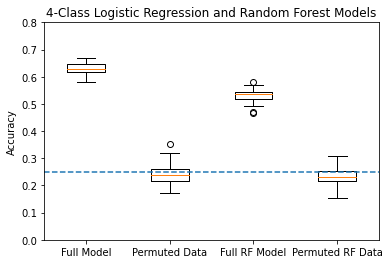

In [29]:
from matplotlib import pyplot as plt
# for some reason, matplotlib doesn't work when this box runs,
# so i re-import it
fig,ax = plt.subplots(1)
permuted_RF_scores = score_RF_rand[1]
df = pd.DataFrame({"Full LR Model":scores,
                   "Permuted LR Data":permuted_scores,
                   "Full RF Model":avg_RF_scores,
                   "Permuted RF Data":permuted_RF_scores
                  })
labels = ["Full Model","Permuted Data","Full RF Model","Permuted RF Data"]

ax.boxplot(df, labels=labels) # plots full model and permuted data model
plt.axhline(.25, linestyle="dashed") # baseline


#formatting
ax.set_ylim(0.0,0.8)
ax.set(
    title = "4-Class Logistic Regression and Random Forest Models",
    ylabel = "Accuracy",

)

[Text(0.5, 1.0, '4-Class Random Forest Classifier Confusion Matrix'),
 Text(0.5, 15.0, 'True Class'),
 Text(33.0, 0.5, 'Predicted class')]

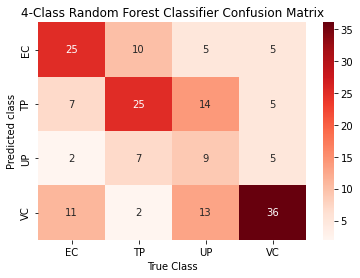

In [30]:

X_processed, y_processed = process_data_etuv(X,y)
kf = KFold(n_splits=10,shuffle = True)
RF = RandomForestClassifier(max_depth=best_depth)   

RF.fit(X_processed, y_processed)
y_pred = cross_val_predict(RF, X_processed, y_processed, cv = kf)

# Plotting and formatting the confusion matrix
MLR_CM = confusion_matrix(y_pred,y_processed)
ax = sns.heatmap(MLR_CM, annot=True, cmap='Reds')

#Labeling classes in the CM
classes = ["EC","TP","UP","VC"]
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set(title = "4-Class Random Forest Classifier Confusion Matrix",
       xlabel = "True Class",
       ylabel = "Predicted class")

Overall worse accuracy compared to the logistic regreression model. Somewhat good performance when prediicting EC, TP, and VC, but also just as relatively bad at predicting Untreated Progressors.